In [1]:
import os
import pickle
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np

from omniisaacgymenvs.data_types import geometry_utils
from omniisaacgymenvs.data_types import se3

/home/wenzhaol/repos/OmniIsaacGymEnvs/omniisaacgymenvs/data_types/transformations.py:2021: UserWarning: No module named 'omniisaacgymenvs.data_types._transformations'
  warnings.warn(str(exc))


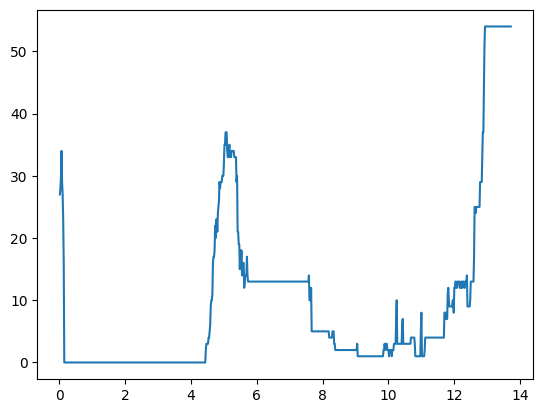

In [2]:
with open(os.path.expanduser('~/data/grasping/contacts.pkl'), 'rb') as f:
    data = pickle.load(f)
timestamps = data['time']
contact_trajectory = data['contact']
world_t_targets = data['target']
num_contacts = []
for all_link_all_contact in contact_trajectory:
  count = 0
  for all_contact in all_link_all_contact:
    count += len(all_contact)
  num_contacts.append(count)

%matplotlib inline
plt.plot(timestamps, num_contacts)

In [15]:
index = next(i for i, t in enumerate(timestamps) if t > 13)
print(index)
save_index = -1
for index in range(len(timestamps)):
  target_pose = se3.Transform(xyz=world_t_targets[index][0], rot=world_t_targets[index][1])
  all_link_all_contact = contact_trajectory[index]
  positions = []
  normals = []
  for all_contact in all_link_all_contact:
    for contact in all_contact:
      contact_pos, contact_nor = contact
      contact_nor = contact_nor / np.linalg.norm(contact_nor)
      positions.append(contact_pos.flatten())
      normals.append(contact_nor.flatten())
  positions = np.array(positions)
  normals = np.array(normals)
  if positions.shape[0] == 0:
    continue
  save_index += 1

  %matplotlib qt
  fig = plt.figure()
  ax = fig.add_subplot(projection='3d')
  # ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2])len(positions)
  ax.quiver(positions[:, 0], positions[:, 1], positions[:, 2], normals[:, 0], normals[:, 1], normals[:, 2], length=0.02, normalize=True)

  # Define the vertices of the cube
  verts = [(0,0,0), (0,1,0), (1,1,0), (1,0,0), (0,0,1), (0,1,1), (1,1,1), (1,0,1)]
  verts = np.array(verts).astype(np.float32)
  verts[:, 0] = verts[:, 0] * 0.0515 - 0.0515 / 2
  verts[:, 1] = verts[:, 1] * 0.1515 - 0.1515 / 2
  verts[:, 2] = verts[:, 2] * 0.0515 - 0.0515 / 2
  world_t_verts = geometry_utils.transform_points(verts.transpose(), target_pose).transpose()

  # Define the faces of the cube
  faces = [(0,1,2,3), (0,4,5,1), (1,5,6,2), (2,6,7,3), (3,7,4,0), (4,7,6,5)]

  # Define the color of the cube
  color = 'red'

  # Create the 3D object and add it to the axis
  polygons = []
  for face in faces:
    polygons.append([world_t_verts[f] for f in face])
  cube = Poly3DCollection(polygons, facecolors=color, edgecolors='black', alpha=0.3)
  ax.add_collection3d(cube)

  # Set the limits of the axis and show the plot
  ax.set_xlim([-0.2, 0.2])
  ax.set_ylim([-0.2, 0.2])
  ax.set_zlim([0, 0.4])
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z')
  plt.show()
  plt.savefig(os.path.expanduser(f'~/exp/frame{save_index:03d}.png'))

779
